# ::::::::::::::::::::::::::::::::::::::ASSIGNMENT 4:::::::::::::::::::::::::::::::::::::::::::::

# Question 1: 
Please go through the blog on developing your first neural network and understand the code.((A) Draw the model architecture by showing each perceptron, input/output/hidden layers.
(B) Change the code to use only 60%, 70%, and 80% data as training, and report test-set performance for all the e
three training data set sizes.
(C) Compare BCE loss with MSE loss.
(D) Change the number of hidden layers from 2 to 4 and compare the perform]ance.

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df=pd.read_csv('pima-indians-diabetes.csv', names=["Number of times pregnant", "Plasma glucose concentration at 2 hours in an oral glucose tolerance test" , 
            "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)", "2-hour serum insulin (μIU/ml)", 
           "Body mass index (weight in kg/(height in m)2)", "Diabetes pedigree function", "Age (years)", "Class Label"], header=None)

In [21]:
# Splitting Dataset into X(features) and y(Class labels)
X=df.iloc[:, 0:8].to_numpy()
y=df.iloc[:,8].to_numpy()

In [22]:
# PyTorch usually operates in a 32-bit floating point while NumPy, by default, uses a 64-bit floating point. 

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

In [23]:
# define the model for hidden layer=2
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 16)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(16, 12)
        self.act2 = nn.ReLU()   
        self.hidden3 = nn.Linear(12, 8)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(8, 4)
        self.act4 = nn.ReLU()
        self.output = nn.Linear(4, 1)
        self.act_output = nn.Sigmoid() 

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.hidden4(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()

In [29]:
# train the model
train_sizes = [0.6, 0.7, 0.8]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-train_size, random_state=42)

    loss_fn = nn.BCELoss() # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    n_epochs = 100
    batch_size = 10
 
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            Xbatch = X_train[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = y_train[i:i+batch_size]
            optimizer.zero_grad()
            loss = loss_fn(y_pred, ybatch)
            loss.backward()
            optimizer.step()

    # compute accuracy
    y_pred = model(X_test)
    bce_accuracy = (y_pred.round() == y_test).float().mean()
    print(f"Accuracy of BCE Loss with {train_size*100}% training set is: {bce_accuracy*100}%")

Accuracy of BCE Loss with 60.0% training set is: 66.88311767578125%
Accuracy of BCE Loss with 70.0% training set is: 65.36796569824219%
Accuracy of BCE Loss with 80.0% training set is: 64.28571319580078%


In [30]:
# train the model
train_sizes = [0.6, 0.7, 0.8]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-train_size, random_state=42)

    MSE_loss_fn = nn.MSELoss() # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    n_epochs = 100
    batch_size = 10
 
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            Xbatch = X_train[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = y_train[i:i+batch_size]
            optimizer.zero_grad()
            loss = MSE_loss_fn(y_pred, ybatch)
            loss.backward()
            optimizer.step()

    # compute accuracy
    y_pred = model(X_test)
    mse_accuracy = (y_pred.round() == y_test).float().mean()
    print(f"Accuracy of MSE Loss with {train_size*100}% training set is: {mse_accuracy*100}%")

Accuracy of MSE Loss with 60.0% training set is: 66.88311767578125%
Accuracy of MSE Loss with 70.0% training set is: 65.36796569824219%
Accuracy of MSE Loss with 80.0% training set is: 64.28571319580078%


# Question 2: 
Develop a neural network that works for MNIST handwritten digit classification.
(A) Draw the model architecture.
(B) Compare its performance with KNN classification.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
# Fetching data from sklearn library
mnist = fetch_openml('mnist_784', parser='auto')
X = mnist.data.to_numpy()
y = mnist.target.astype(int).to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train/255
X_test=X_test/255

In [5]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8689 - loss: 0.4558
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9661 - loss: 0.1118
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0761
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0572
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0464


In [8]:
model.evaluate(X_test, y_test) #Validation

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9730 - loss: 0.0924


[0.09453757107257843, 0.9738571643829346]

In [9]:
y_pred=model.predict(X_test) #Prediction

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


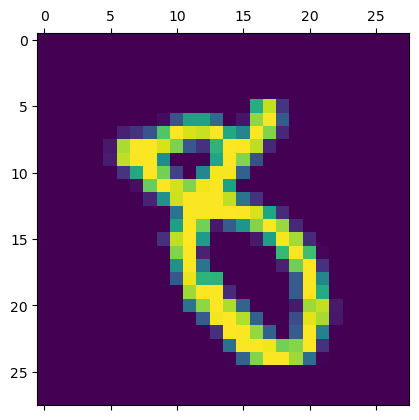

In [10]:
plt.matshow(X_test[2].reshape(28,28))

In [11]:
y_pred = [np.argmax(i) for i in y_pred] # Highest probability of a specific number--->argmax to get that number 

Picked Index is: 748


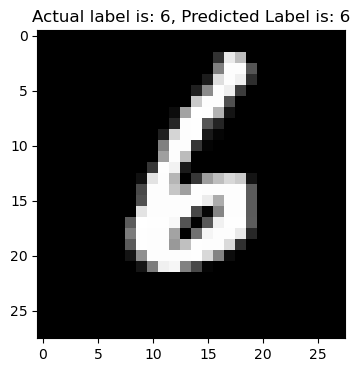

In [12]:
# Randomly pick an index
random_index = np.random.randint(0, len(X_test))
print(f"Picked Index is: {random_index}")


# Get the image data and label
image = X_test[random_index].reshape(28,28) # Converting 784 pixels into 28*28
actual_label=y_test[random_index]
predicted_label = y_pred[random_index]

# Display the predcited image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f"Actual label is: {actual_label}, Predicted Label is: {predicted_label}")
plt.show()